In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from pyroomacoustics.parameters import constants

In [2]:
Fs = 88200
center_freqs = constants.get('freq_table_frequencies')
f_len = constants.get('freq_table_length')
absorption = np.ones((f_len))
w_len = 512

In [8]:
ranges = [[fr*3/4,fr*3/2] for fr in center_freqs]
ranges[0][0] = 1
ranges[5][1] = Fs/2-1000

### FIRWIN

In [11]:
taps= np.zeros((f_len,w_len))
for i in range(f_len):
    taps[i] = (signal.firwin(numtaps=w_len,
                       cutoff=ranges[i],
                       fs=Fs,
                       pass_zero=False, 
                       window='hann',
                       scale=False))
tapsSum = np.sum(taps, axis=0)

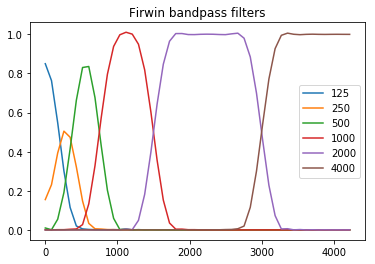

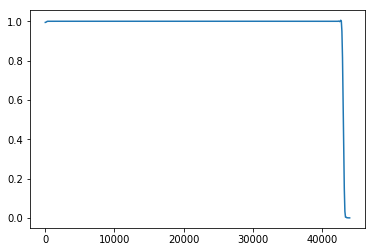

In [45]:
plt.figure()
for i in range(f_len):
    w,h = signal.freqz(taps[i],1)
    x = (Fs * 0.5 / np.pi) * w
    y = abs(h)
    plt.plot(x[:50], y[:50], label="%d" % center_freqs[i])
plt.title('Firwin bandpass filters')
plt.legend()
plt.show()

w,h = signal.freqz(tapsSum,1)
x = (Fs * 0.5 / np.pi) * w
y = abs(h)
plt.plot(x, y)
plt.show()

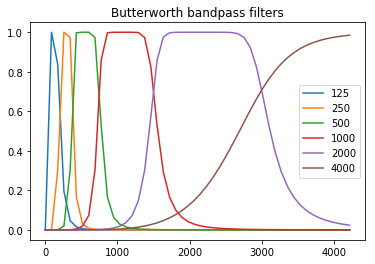

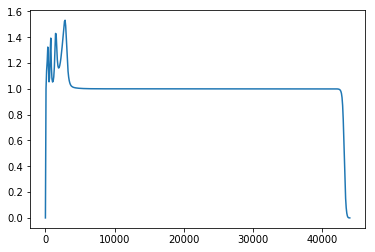

In [43]:
htot= np.zeros((f_len,w_len))
rangesW = [[(f[0])*2/Fs,(f[1])*2/Fs] for f in ranges]
plt.figure()
for i in range(f_len):
    sos = (signal.butter(N=5,
                        Wn=rangesW[i],
                        btype='band',
                        output='sos'))
    w, h = signal.sosfreqz(sos)
    x = (Fs*0.5/np.pi) * w
    y = abs(h)
    plt.plot(x[:50], y[:50], label="%d" % center_freqs[i])
    htot[i] = y
plt.title('Butterworth bandpass filters')
plt.legend()
plt.show()

x = (Fs*0.5/np.pi) * w
y = np.sum(htot,axis=0)
plt.plot(x, y)
plt.show()